In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

df_all = pd.read_csv("C:\\Users\\b01297ar\\Documents\\ProstateMRL-local\\ProstateMRL-Radiomics\\UntrackedCode\\TestData\\AllFts.csv")


In [2]:
df_signal= df_all.loc[df_all['ContourType'] == 'Manual']
df_signal= df_signal.loc[df_signal['Feature'] == 'firstorder_Median']

df_signal = df_signal[['PatID', 'Fraction', 'FeatureValue']]

patIDs = df_signal['PatID'].unique()

In [4]:
rand_pats = np.random.choice(patIDs, 3, replace=False)

c:\Users\b01297ar\Documents\ProstateMRL-local\ProstateMRL-Radiomics\envPR\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  # This is added back by InteractiveShellApp.init_path()


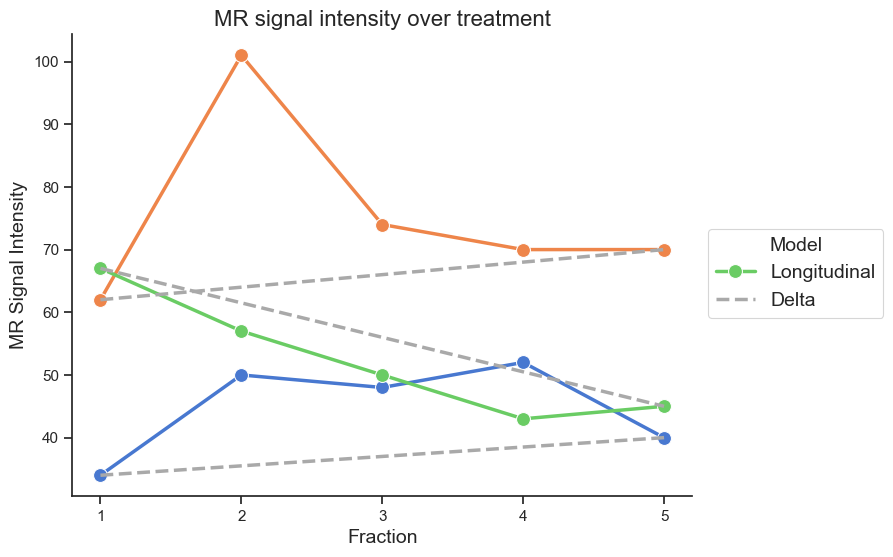

In [11]:

df_long = df_signal.loc[df_signal['PatID'].isin(rand_pats)]
df_del = df_long.loc[df_long['Fraction'].isin([1,5])]

# plot
fig, ax = plt.subplots(figsize=(8, 6))
# sns.set(style="whitegrid")
sns.set_context("paper", font_scale=1.5)
custom_params = {"axes.spines.right": False, "axes.spines.top": False}

sns.lineplot(x="Fraction", y="FeatureValue", hue="PatID", data=df_long, ax=ax, palette="muted", 
             legend=False, ci=None, marker='o', markersize=10, linewidth=2.5, label='Longitudinal')
for pat in rand_pats:
    df_pat = df_del.loc[df_del['PatID'] == pat]
    ax.plot(df_pat['Fraction'], df_pat['FeatureValue'], color='darkgrey', linestyle='dashed', linewidth=2.5, label='Delta')

# set labels
ax.set_xlabel('Fraction', fontsize=14)
ax.set_ylabel('MR Signal Intensity', fontsize=14)
ax.set_title('MR signal intensity over treatment', fontsize=16)

# set custom legend labels
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[2:4], labels[2:4], bbox_to_anchor=(1.01, 0.6), title='Model', title_fontsize=14, fontsize=14)
ax.set_xticks([1,2,3,4,5])
sns.set_theme(style="ticks", rc=custom_params)

fig.savefig('Plots/MedSignalPlot.png', dpi=300, bbox_inches='tight')

c:\Users\b01297ar\Documents\ProstateMRL-local\ProstateMRL-Radiomics\UntrackedCode\envPR\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


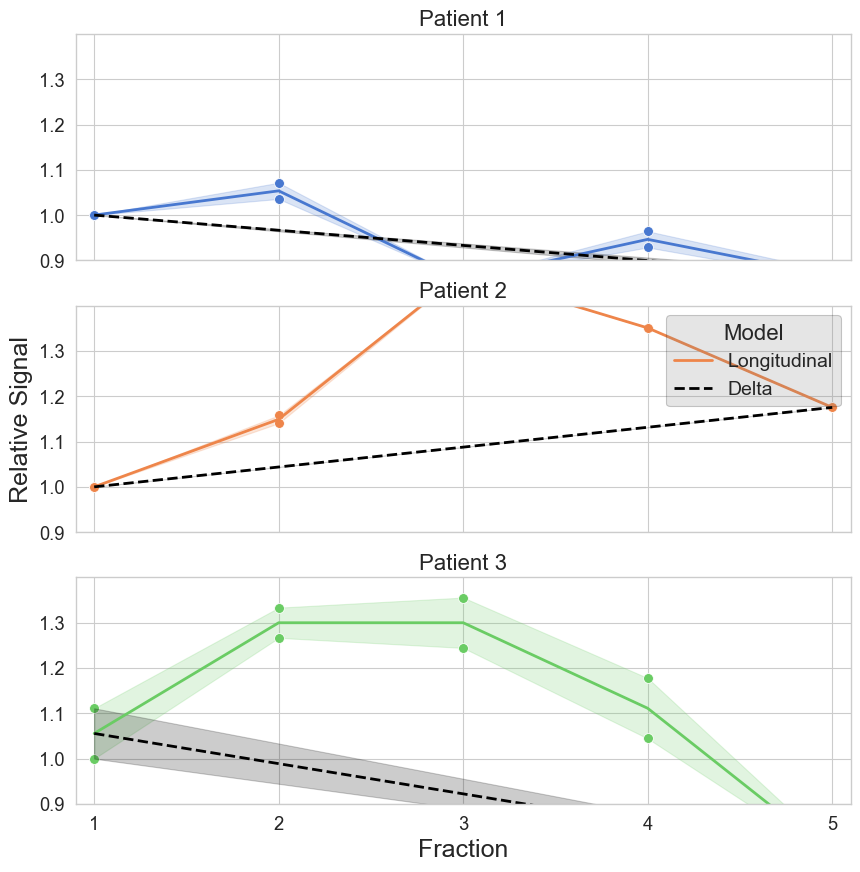

In [6]:
df_sigplot = df_signal.loc[df_signal['PatID'].isin(rand_pats)]
df_sigplot['BaseChange'] = df_sigplot['BaseChange'] + 1
# make 3x1 subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)
mut_cols = sns.color_palette("muted", 3)
for i, axe in enumerate(axes):
    axe.set_title('Patient ' + str(i + 1), fontsize=16)
    df_pat = df_sigplot.loc[df_sigplot['PatID'] == rand_pats[i]]
    # axe.set_xlabel('Fraction')
    axe.set_xlim(0.9, 5.1)
    sns.lineplot(df_sigplot.loc[df_sigplot['PatID'] == rand_pats[i]], x='Fraction', y ='BaseChange', 
                ax=axe, legend=False, color=mut_cols[i], linewidth = 2, label='Longitudinal')
    sns.scatterplot(df_sigplot.loc[df_sigplot['PatID'] == rand_pats[i]], x='Fraction', y ='BaseChange',
                ax=axe, legend=False, color=mut_cols[i], s=50)
    sns.lineplot(df_sigplot.loc[(df_sigplot['PatID'] == rand_pats[i]) & (df_signal['Fraction'].isin([1,5]))], x='Fraction', y ='BaseChange',
                ax=axe, legend=False, color='black', linewidth = 2, linestyle='--', label='Delta')
    axe.set_ylim(df_pat['BaseChange'].min() - 0.10, df_pat['BaseChange'].max() + 0.10)
    axe.set_yticks(np.arange(df_pat['BaseChange'].min() - 0.10, df_pat['BaseChange'].max() + 0.1, 0.1))
    # axe.set_yticklabels(np.arange(df_pat['BaseChange'].min() - 0.1, df_pat['BaseChange'].max() + 0.1, 0.1))
    axe.set_ylabel(' ')
    axe.set_xlabel(' ')
    # axe.set_ylim(0.75, 1.4)
    y_min, y_max = np.round(df_pat['BaseChange'].min() - 0.1, 1), np.round(df_pat['BaseChange'].max() + 0.1, 1)
    axe.set_ylim(0.9, 1.4)
    axe.set_yticks(np.arange(0.9,1.4, 0.1))

axes[1].set_ylabel('Relative Signal', fontsize=18)
axes[1].legend(title='Model',loc='upper right', title_fontsize=16,  fontsize=14, fancybox=True, facecolor='grey', framealpha=0.2, edgecolor='black')
axes[2].set_xlabel('Fraction', fontsize=18)
axes[2].set_xticks(np.arange(1, 5.1, 1))
axes[2].set_xticklabels(np.arange(1, 5.1, 1).astype(int))
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(12, 8))
df_long = df_signal.copy()
df_delta = df_long.loc[df_long["Fraction"].isin([1,5])]

# Delta plot
sns.lineplot(x="Fraction", y="BaseChange", hue="PatID",palette='muted,' data=df_delta, ax=axes[0])



SyntaxError: invalid syntax (724534053.py, line 6)